# Predict Clicked Ads Customer Classification by using Machine Learning

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.23.5
pandas version :  1.5.3
seaborn version :  0.12.2


## Download file dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Ganti path file dengan path sesuai dengan file di Google Drive
file_path = '/content/drive/My Drive/mini project/4/Clicked Ads Dataset.csv'

# Membaca file CSV ke dalam DataFrame Pandas
df = pd.read_csv(file_path)

In [ ]:
df.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.00,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.00,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.00,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.00,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.00,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


In [ ]:
df.shape

(1000, 11)

In [ ]:
# Menambahkan tanda baca di antara kata pada judul kolom
df.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)

# Mengonversi semua judul kolom menjadi huruf kecil
df.columns = [col.lower() for col in df.columns]

In [ ]:
# Mengganti judul kolom 'male' menjadi 'gender'
df.rename(columns={'male': 'gender'}, inplace=True)

In [ ]:
# Mengganti "Yes" menjadi 1 dan "No" menjadi 0 dalam kolom "Kolom_A"
df['clicked_on_ad'] = df['clicked_on_ad'].replace({'Yes': 1, 'No': 0})

# Customer Type and Behaviour Analysis on Advertisement

## Melakukan analisis univariate pada kolom umur, penggunaan internet harian, dan daily time spent on site dengan membedakan user yang mengklik iklan dan yang tidak(Hint: Perhatikan distribusi pada setiap kolom pada dataset)

### Statistical analysis

In [ ]:
#num = ['unnamed:_0', 'daily_time_spent_on_site', 'age', 'area_income', 'daily_internet_usage', 'clicked_on_ad']
#cats = ['male', 'timestamp', 'city', 'province', 'category']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   unnamed:_0                1000 non-null   int64  
 1   daily_time_spent_on_site  987 non-null    float64
 2   age                       1000 non-null   int64  
 3   area_income               987 non-null    float64
 4   daily_internet_usage      989 non-null    float64
 5   gender                    997 non-null    object 
 6   timestamp                 1000 non-null   object 
 7   clicked_on_ad             1000 non-null   int64  
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 86.1+ KB


In [ ]:
# List of column names containing numerical data
num = df.select_dtypes(include='number').columns.tolist()

# List of column names containing categorical/object data
cats = df.select_dtypes(include='object').columns.tolist()

In [ ]:
num

['unnamed:_0',
 'daily_time_spent_on_site',
 'age',
 'area_income',
 'daily_internet_usage',
 'clicked_on_ad']

In [ ]:
cats

['gender', 'timestamp', 'city', 'province', 'category']

In [ ]:
#data Numerik
pd.set_option('display.float_format', '{:.2f}'.format)  # mengeluarkan describe dari format 'e'
df_stats = df[num].describe()
df_stats

,unnamed:_0,daily_time_spent_on_site,age,area_income,daily_internet_usage,clicked_on_ad
count,1000.00,987.00,1000.00,987.00,989.00,1000.00
mean,499.50,64.93,36.01,384864670.64,179.86,0.50
std,288.82,15.84,8.79,94079989.57,43.87,0.50
min,0.00,32.60,19.00,97975500.00,104.78,0.00
25%,249.75,51.27,29.00,328632990.00,138.71,0.00
50%,499.50,68.11,35.00,399068320.00,182.65,0.50
75%,749.25,78.46,42.00,458355450.00,218.79,1.00
max,999.00,91.43,61.00,556393600.00,267.01,1.00


In [ ]:
#Data Kategorik
df.describe(include=object)

,gender,timestamp,city,province,category
count,997,1000,1000,1000,1000
unique,2,997,30,16,10
top,Perempuan,5/26/2016 15:40,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif
freq,518,2,64,253,112


### Univariate analysis

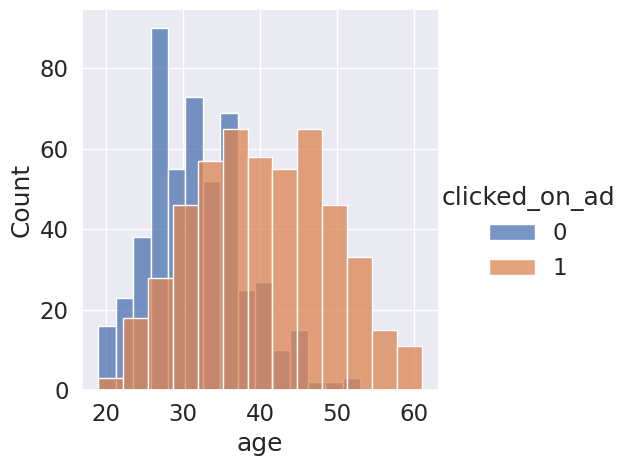

In [ ]:
g = sns.FacetGrid(df, hue='clicked_on_ad', height=5)
g.map(sns.histplot, 'age')
g.add_legend()

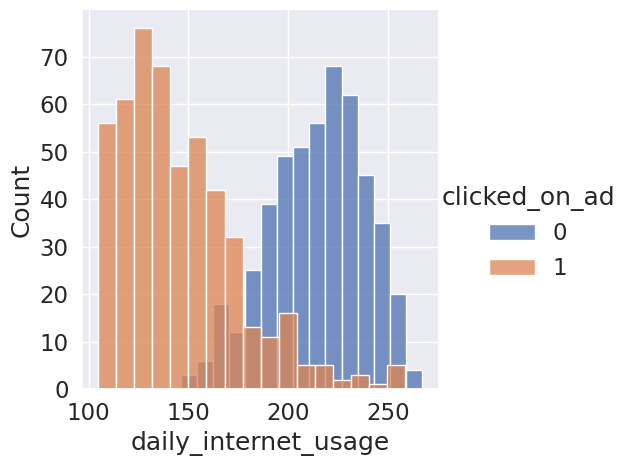

In [ ]:
e = sns.FacetGrid(df, hue='clicked_on_ad', height=5)
e.map(sns.histplot, 'daily_internet_usage')
e.add_legend()

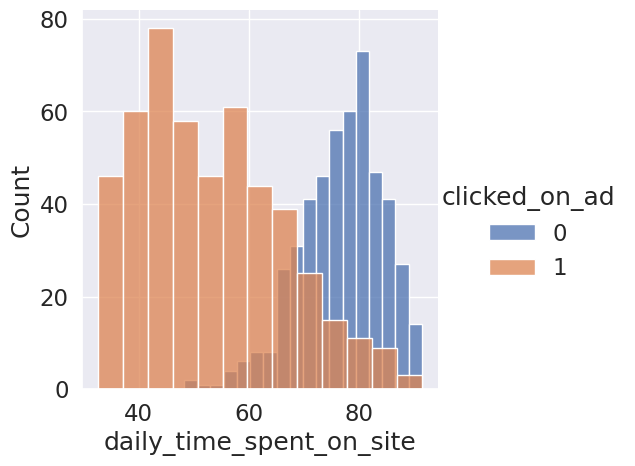

In [ ]:
e = sns.FacetGrid(df, hue='clicked_on_ad', height=5)
e.map(sns.histplot, 'daily_time_spent_on_site')
e.add_legend()

## Melakukan bivariate analysis pada variable yang telah diteliti pada univatriate analysis (Hint:Perhatikan hubungan antar kolom pada dataset)

### Bivariate analysis

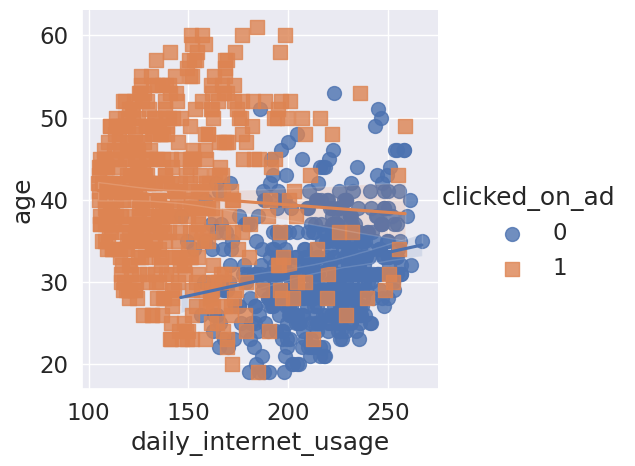

In [ ]:
# Menggunakan sns.lmplot dengan argumen x, y, dan hue
sns.lmplot(x='daily_internet_usage', y='age', data=df, hue='clicked_on_ad', scatter_kws={'s': 100}, markers=["o", "s"])

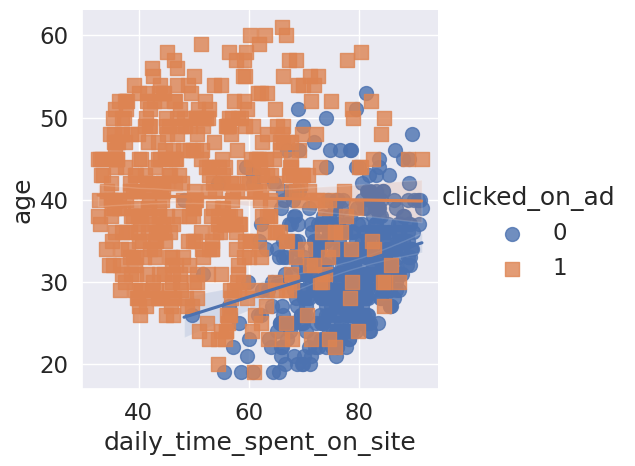

In [ ]:
# Menggunakan sns.lmplot dengan argumen x, y, dan hue
sns.lmplot(x='daily_time_spent_on_site', y='age', data=df, hue='clicked_on_ad', scatter_kws={'s': 100}, markers=["o", "s"])

## Membuat korelasi antar kolom dan lakukan multivariate analysis (Hint: Carilah hubungan antar kolom yang memiliki nilai korelasi yang tinggi)

### Multivariate analysis

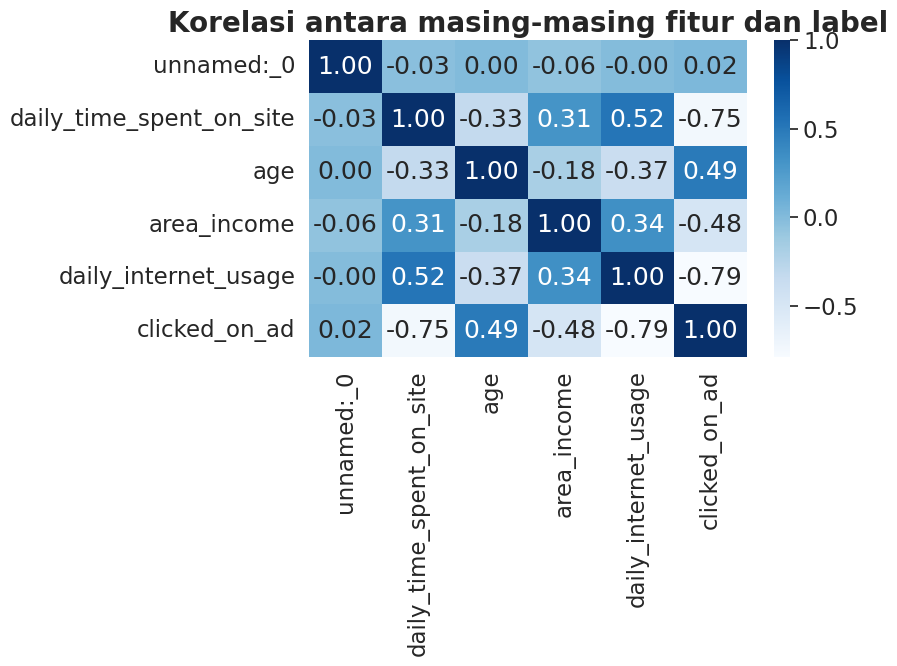

In [ ]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(9, 7))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

plt.title('Korelasi antara masing-masing fitur dan label', fontsize=20, weight='bold')
plt.tight_layout()
plt.savefig('heatmap', dpi=200)

# Data Cleaning and Processing

## Membersihkan dataset dari missing value dan duplicated value
Hint: Perhatikan null/missing value, data yang kosong dapat dibuang atau diisi dengan nilai yang tidak mengubah sebaran data

In [ ]:
df.isnull().sum()

unnamed:_0                   0
daily_time_spent_on_site    13
age                          0
area_income                 13
daily_internet_usage        11
gender                       3
timestamp                    0
clicked_on_ad                0
city                         0
province                     0
category                     0
dtype: int64

In [ ]:
df.describe(include='object')

,gender,timestamp,city,province,category
count,997,1000,1000,1000,1000
unique,2,997,30,16,10
top,Perempuan,5/26/2016 15:40,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif
freq,518,2,64,253,112


In [ ]:
# kolom null : daily_time_spent_on_site, area_income, daily_internet_usage, cmale
# handle null
df ['daily_time_spent_on_site'] = df['daily_time_spent_on_site'].fillna(df['daily_time_spent_on_site'].median())
df ['area_income'] = df['area_income'].fillna(df['area_income'].median())
df ['daily_internet_usage'] = df['daily_internet_usage'].fillna(df['daily_internet_usage'].median())
df ['gender'] = df['gender'].fillna('Perempuan')

In [ ]:
df.isnull().sum()

unnamed:_0                  0
daily_time_spent_on_site    0
age                         0
area_income                 0
daily_internet_usage        0
gender                      0
timestamp                   0
clicked_on_ad               0
city                        0
province                    0
category                    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df2 = df.copy()

## Melakukan feature encoding pada dataset
Hint: Perhatikan tipe data pada setiap kolomnya

- tipe data binary: mengandung kata yes-no maupun true-false.
- tipe data ordinal: kategori dapat diurutkan.
- tipe data nominal: kategori tidak dapat diurutkan.
- data ordinal menggunakan Label Encoding.
- data nominal menggunakan One Hot Encoding.

In [ ]:
# OHE with pandas
df = pd.get_dummies(df, prefix=['gender'], columns=['gender'])
df = pd.get_dummies(df, prefix=['province'], columns=['province'])
df = pd.get_dummies(df, prefix=['category'], columns=['category'])
df = pd.get_dummies(df, prefix=['city'], columns=['city'])

In [ ]:
df

,unnamed:_0,daily_time_spent_on_site,age,area_income,daily_internet_usage,timestamp,clicked_on_ad,gender_Laki-Laki,gender_Perempuan,province_Bali,...,city_Palembang,city_Pontianak,city_Samarinda,city_Semarang,city_Serang,city_Surabaya,city_Surakarta,city_Tangerang,city_Tangerang Selatan,city_Tasikmalaya
0,0,68.95,35,432837300.00,256.09,3/27/2016 0:53,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,80.23,31,479092950.00,193.77,4/4/2016 1:39,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,69.47,26,418501580.00,236.50,3/13/2016 20:35,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,3,74.15,29,383643260.00,245.89,1/10/2016 2:31,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,68.37,35,517229930.00,225.58,6/3/2016 3:36,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,72.97,30,499691990.00,208.58,2/11/2016 21:49,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
996,996,51.30,45,474475190.00,134.42,4/22/2016 2:07,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
997,997,68.11,51,296910040.00,120.37,2/1/2016 17:24,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
998,998,55.55,19,293445530.00,187.95,3/24/2016 2:35,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


## Split data menjadi feature dan target
Hint: Pilih satu kolom menjadi target dan sisanya menjadi feature data

- drop feature `unnamed:_0` karena terlalu banyak nilai unik.

In [ ]:
df.drop(columns=['unnamed:_0'],inplace=True)

In [ ]:
df.columns

Index(['daily_time_spent_on_site', 'age', 'area_income',
       'daily_internet_usage', 'timestamp', 'clicked_on_ad',
       'gender_Laki-Laki', 'gender_Perempuan', 'province_Bali',
       'province_Banten', 'province_Daerah Khusus Ibukota Jakarta',
       'province_Jawa Barat', 'province_Jawa Tengah', 'province_Jawa Timur',
       'province_Kalimantan Barat', 'province_Kalimantan Selatan',
       'province_Kalimantan Timur', 'province_Kepulauan Riau',
       'province_Lampung', 'province_Riau', 'province_Sulawesi Selatan',
       'province_Sumatra Barat', 'province_Sumatra Selatan',
       'province_Sumatra Utara', 'category_Bank', 'category_Electronic',
       'category_Fashion', 'category_Finance', 'category_Food',
       'category_Furniture', 'category_Health', 'category_House',
       'category_Otomotif', 'category_Travel', 'city_Balikpapan',
       'city_Bandar Lampung', 'city_Bandung', 'city_Banjarmasin', 'city_Batam',
       'city_Bekasi', 'city_Bogor', 'city_Cimahi', 'city_Den

In [ ]:
# Select all columns except 'clicked_on_ad' to create featr
x = df.drop(columns=['clicked_on_ad'])

# Create targt with only the 'clicked_on_ad' column
y = df[['clicked_on_ad']]

In [ ]:
x.shape

(1000, 63)

In [ ]:
y.shape

(1000, 1)

## Melakukan ekstraksi pada kolom yang berhubungan dengan waktu
Hint: Buatlah kolom baru untuk mengekstraksi data waktu menjadi tahun, bulan, pekan, dan hari.

In [ ]:
# Ubah kolom timestamp menjadi tipe datetime
x['timestamp'] = pd.to_datetime(x['timestamp'], format='%m/%d/%Y %H:%M')

# Buat kolom-kolom baru
x['year'] = x['timestamp'].dt.year
x['month'] = x['timestamp'].dt.month
x['week'] = x['timestamp'].dt.week
x['day'] = x['timestamp'].dt.day


In [ ]:
x[['year','month','week','day']].describe()

,year,month,week,day
count,1000.00,1000.00,1000.00,1000.00
mean,2016.00,3.82,15.42,15.48
std,0.00,1.93,9.71,8.73
min,2016.00,1.00,1.00,1.00
25%,2016.00,2.00,8.00,8.00
50%,2016.00,4.00,15.00,15.00
75%,2016.00,5.00,22.00,23.00
max,2016.00,7.00,53.00,31.00


In [ ]:
x.drop(columns=['timestamp'],inplace=True)

# Data Modelling

## Membagi data secara terpisah yang nanti akan digunakan sebagai data train dan data test
Hint: "Data train 70-80%, Data test 20-30%"

In [ ]:
X1 = x.copy() # x1 dan y1 digunakan untuk eksperimen 1
y1 = y.copy()
X2 = x.copy() # x2 dan y2 digunakan untuk eksperimen 2
y2 = y.copy()

In [ ]:
from sklearn.model_selection import train_test_split
# 70 : 30
X1_train1, X1_test1, y1_train1, y1_test1 = train_test_split(X1,y1,test_size=0.3, random_state=1)
# 80 : 20
X1_train2, X1_test2, y1_train2, y1_test2 = train_test_split(X1,y1,test_size=0.2, random_state=1)

In [ ]:
print('Split into 70:30')
print('Total rows & column of train set:',X1_train1.shape)
print('Total rows & column of test set:',X1_test1.shape)
print('\nSplit into 80:20')
print('Total rows & column of train set:',X1_train2.shape)
print('Total rows & column of test set:',X1_test2.shape)

Split into 70:30
Total rows & column of train set: (700, 66)
Total rows & column of test set: (300, 66)

Split into 80:20
Total rows & column of train set: (800, 66)
Total rows & column of test set: (200, 66)


## Membuat dua eksperimen model machine learning dengan beberapa jenis algoritma model machine learning, dimana eksperimen pertama tanpa menggunakan normalisasi data, dan yang kedua menggunakan normalisasi data.
Hint: Gunakan model machine learning yang sama pada kedua experiment tersebut.

In [ ]:
!pip install -U scikit-learn

### eksperimen pertama

In [ ]:
#Function Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model,  y_train_pred, y_test_pred, y_train, y_test):
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_train_pred))
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_test_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_train_pred, zero_division=0))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_test_pred, zero_division=0))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_train_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_test_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_train_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_test_pred))

    fpr, tpr, thresholds = roc_curve(y_train, y_train_pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC (Train Set): %.2f" % auc(fpr, tpr))
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC (Test Set): %.2f" % auc(fpr, tpr))

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

def cfm(y_test,y_pred):
    cf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,6))
    sns.set(font_scale = 1.5)
    ax = sns.heatmap(cf_matrix, annot=True,fmt = 'd')
    plt.title('Confusion Matrix From Test Set',fontsize=18)
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Actual Values')
    plt.show()

In [ ]:
#check dataset
print(X1_train1.shape)
print(X1_test1.shape)

(700, 66)
(300, 66)


#### logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

hyperparameters = dict(penalty = ['l2','l1','elasticnet','none'],
                       C = [0.0001, 0.001, 0.002],
                       solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])

logreg = LogisticRegression(random_state=1)
logreg_tuned = RandomizedSearchCV(logreg, hyperparameters, cv=5, random_state=1, scoring='recall')
logreg_tuned.fit(X1_train1, y1_train1)

y_train_pred = logreg_tuned.predict(X1_train1)
y_pred = logreg_tuned.predict(X1_test1)

eval_classification(logreg_tuned, y_train_pred, y_pred, y1_train1, y1_test1)

Accuracy (Train Set): 0.98
Accuracy (Test Set): 0.96
Precision (Train Set): 0.99
Precision (Test Set): 1.00
Recall (Train Set): 0.97
Recall (Test Set): 0.93
F1-Score (Train Set): 0.98
F1-Score (Test Set): 0.96
AUC (Train Set): 0.98
AUC (Test Set): 0.96


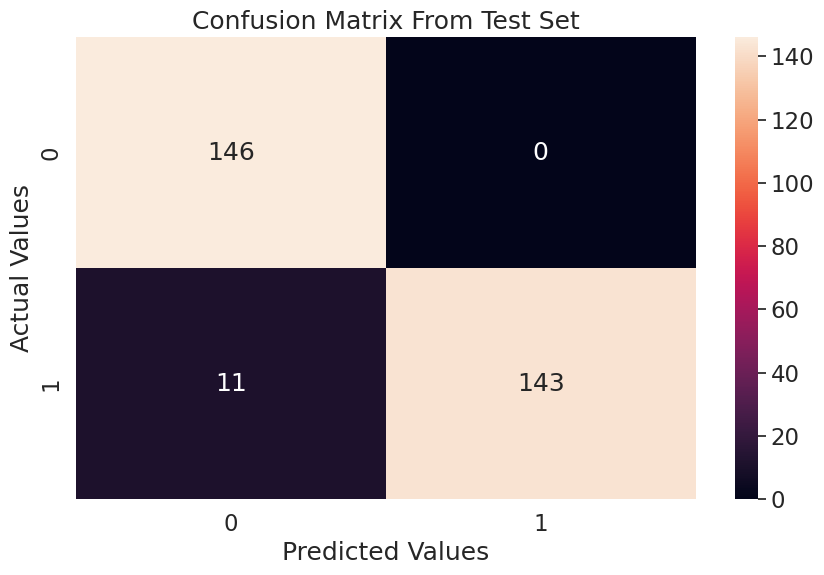

In [ ]:
cfm(y1_test1,y_pred)

#### random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)],
                       bootstrap = [True],
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)],
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)],
                       max_features = ['auto', 'sqrt', 'log2'],
                       n_jobs = [-1])

rf = RandomForestClassifier(random_state=1)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=1, scoring='recall')
rf_tuned.fit(X1_train1,y1_train1)

y_train_pred = rf_tuned.predict(X1_train1)
y_pred = rf_tuned.predict(X1_test1)

eval_classification(rf_tuned, y_train_pred, y_pred, y1_train1, y1_test1)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.96
Precision (Train Set): 1.00
Precision (Test Set): 0.99
Recall (Train Set): 1.00
Recall (Test Set): 0.93
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.96
AUC (Train Set): 1.00
AUC (Test Set): 0.96


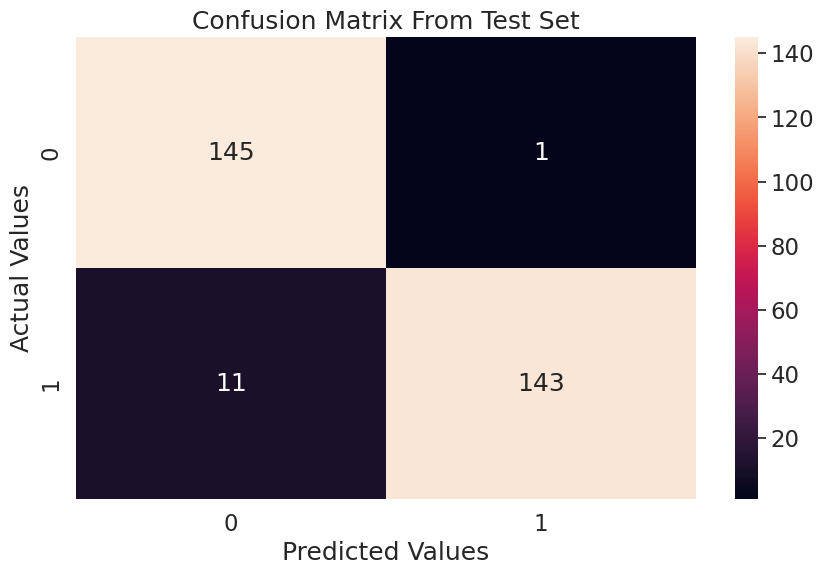

In [ ]:
cfm(y1_test1,y_pred)

#### decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

hyperparameters = dict(max_depth=[int(x) for x in np.linspace(1, 110, num = 30)],
                       min_samples_split=[2, 5, 10, 100],
                       min_samples_leaf=[1, 2, 4, 10, 20, 50],
                       max_features=['auto', 'sqrt']
                      )

dt = DecisionTreeClassifier(random_state=1)
dt_tuned = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=1, scoring='recall')
dt_tuned.fit(X1_train1, y1_train1)

y_train_pred = dt_tuned.predict(X1_train1)
y_pred = dt_tuned.predict(X1_test1)

eval_classification(dt_tuned, y_train_pred, y_pred, y1_train1, y1_test1)

Accuracy (Train Set): 0.93
Accuracy (Test Set): 0.89
Precision (Train Set): 0.97
Precision (Test Set): 0.95
Recall (Train Set): 0.88
Recall (Test Set): 0.82
F1-Score (Train Set): 0.92
F1-Score (Test Set): 0.88
AUC (Train Set): 0.93
AUC (Test Set): 0.89


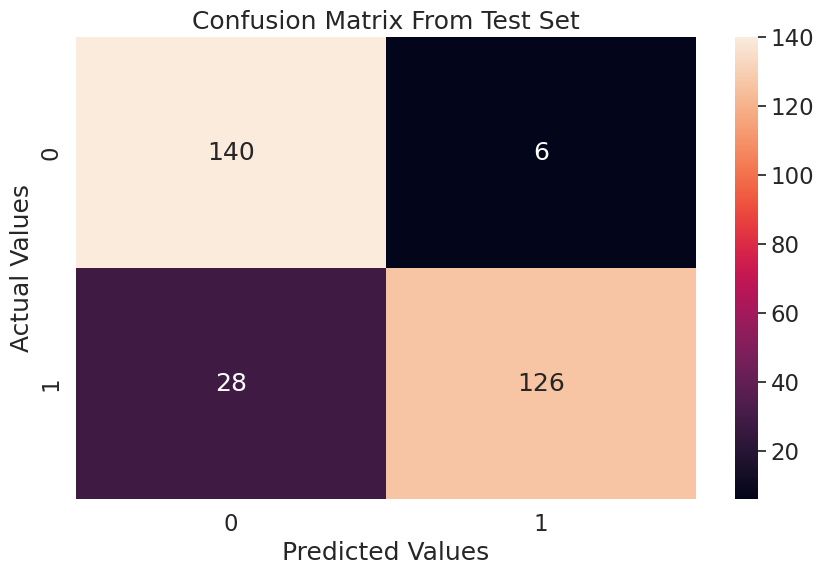

In [ ]:
cfm(y1_test1,y_pred)

#### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.neighbors import KNeighborsClassifier

hyperparameters = dict(n_neighbors = list(range(1,30)),
                       p=[1,2],
                       algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute'])

knn = KNeighborsClassifier()
knn_tuned = RandomizedSearchCV(knn, hyperparameters, cv=5, random_state=1, scoring='recall')
knn_tuned.fit(X1_train1, y1_train1)

y_train_pred = knn_tuned.predict(X1_train1)
y_pred = knn_tuned.predict(X1_test1)

eval_classification(knn_tuned, y_train_pred, y_pred, y1_train1, y1_test1)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.62
Precision (Train Set): 1.00
Precision (Test Set): 0.64
Recall (Train Set): 1.00
Recall (Test Set): 0.60
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.62
AUC (Train Set): 1.00
AUC (Test Set): 0.62


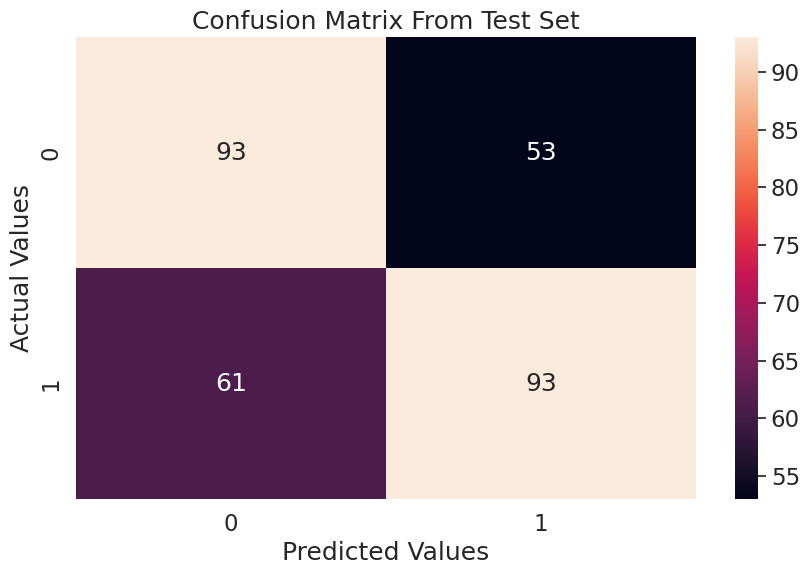

In [ ]:
cfm(y1_test1,y_pred)

### eksperimen kedua

In [ ]:
print(X2.shape)
print(y2.shape)

(1000, 66)
(1000, 1)


In [ ]:
from sklearn.model_selection import train_test_split
# 70 : 30
X2_train1, X2_test1, y2_train1, y2_test1 = train_test_split(X2,y2,test_size=0.3, random_state=1)
# 80 : 20
X2_train2, X2_test2, y2_train2, y2_test2 = train_test_split(X2,y2,test_size=0.2, random_state=1)

In [ ]:
print('Split into 70:30')
print('Total rows & column of train set:',X2_train1.shape)
print('Total rows & column of test set:',X2_test1.shape)
print('\nSplit into 80:20')
print('Total rows & column of train set:',X2_train2.shape)
print('Total rows & column of test set:',X2_test2.shape)

Split into 70:30
Total rows & column of train set: (700, 66)
Total rows & column of test set: (300, 66)

Split into 80:20
Total rows & column of train set: (800, 66)
Total rows & column of test set: (200, 66)


### standardization data train

In [ ]:
print(X2_train1.shape)

(700, 66)


In [ ]:
X2_train1.columns

Index(['daily_time_spent_on_site', 'age', 'area_income',
       'daily_internet_usage', 'gender_Laki-Laki', 'gender_Perempuan',
       'province_Bali', 'province_Banten',
       'province_Daerah Khusus Ibukota Jakarta', 'province_Jawa Barat',
       'province_Jawa Tengah', 'province_Jawa Timur',
       'province_Kalimantan Barat', 'province_Kalimantan Selatan',
       'province_Kalimantan Timur', 'province_Kepulauan Riau',
       'province_Lampung', 'province_Riau', 'province_Sulawesi Selatan',
       'province_Sumatra Barat', 'province_Sumatra Selatan',
       'province_Sumatra Utara', 'category_Bank', 'category_Electronic',
       'category_Fashion', 'category_Finance', 'category_Food',
       'category_Furniture', 'category_Health', 'category_House',
       'category_Otomotif', 'category_Travel', 'city_Balikpapan',
       'city_Bandar Lampung', 'city_Bandung', 'city_Banjarmasin', 'city_Batam',
       'city_Bekasi', 'city_Bogor', 'city_Cimahi', 'city_Denpasar',
       'city_Depok', '

In [ ]:
to_std = ['daily_time_spent_on_site', 'age', 'area_income',
       'daily_internet_usage','month','week','day']

In [ ]:
from sklearn.preprocessing import StandardScaler

for i in range(0,len(to_std)):
  X2_train1[to_std[i]] = StandardScaler().fit_transform(X2_train1[to_std[i]].values.reshape(len(X2_train1), 1))

In [ ]:
X2_train1[to_std].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
daily_time_spent_on_site,700.00,-0.00,1.00,-2.02,-0.89,0.22,0.86,1.69
age,700.00,0.00,1.00,-1.99,-0.74,-0.13,0.68,2.77
area_income,700.00,0.00,1.00,-3.02,-0.59,0.16,0.78,1.82
daily_internet_usage,700.00,0.00,1.00,-1.71,-0.92,0.07,0.87,1.99
month,700.00,0.00,1.00,-1.46,-0.95,0.09,0.60,1.64
week,700.00,-0.00,1.00,-1.50,-0.88,-0.04,0.68,3.91
day,700.00,-0.00,1.00,-1.71,-0.90,0.02,0.83,1.75


### standardization data test

In [ ]:
X2_test1.shape

(300, 66)

In [ ]:
from sklearn.preprocessing import StandardScaler

for i in range(0,len(to_std)):
  X2_test1[to_std[i]] = StandardScaler().fit_transform(X2_test1[to_std[i]].values.reshape(len(X2_test1), 1))

In [ ]:
X2_test1[to_std].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
daily_time_spent_on_site,300.00,0.00,1.00,-2.14,-0.80,0.21,0.83,1.65
age,300.00,0.00,1.00,-1.82,-0.73,-0.18,0.58,2.77
area_income,300.00,0.00,1.00,-3.17,-0.62,0.16,0.76,1.76
daily_internet_usage,300.00,-0.00,1.00,-1.75,-0.98,0.08,0.89,1.82
month,300.00,0.00,1.00,-1.46,-0.94,0.11,0.64,1.69
week,300.00,-0.00,1.00,-1.45,-0.75,-0.14,0.66,3.79
day,300.00,0.00,1.00,-1.55,-0.87,-0.08,0.94,1.85


#### logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

hyperparameters = dict(penalty = ['l2','l1','elasticnet','none'],
                       C = [0.0001, 0.001, 0.002],
                       solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])

logreg = LogisticRegression(random_state=1)
logreg_tuned = RandomizedSearchCV(logreg, hyperparameters, cv=5, random_state=1, scoring='recall')
logreg_tuned.fit(X2_train1, y2_train1)

y_train_pred = logreg_tuned.predict(X2_train1)
y_pred = logreg_tuned.predict(X2_test1)

eval_classification(logreg_tuned, y_train_pred, y_pred, y2_train1, y2_test1)

Accuracy (Train Set): 0.99
Accuracy (Test Set): 0.95
Precision (Train Set): 0.99
Precision (Test Set): 0.96
Recall (Train Set): 0.99
Recall (Test Set): 0.94
F1-Score (Train Set): 0.99
F1-Score (Test Set): 0.95
AUC (Train Set): 0.99
AUC (Test Set): 0.95


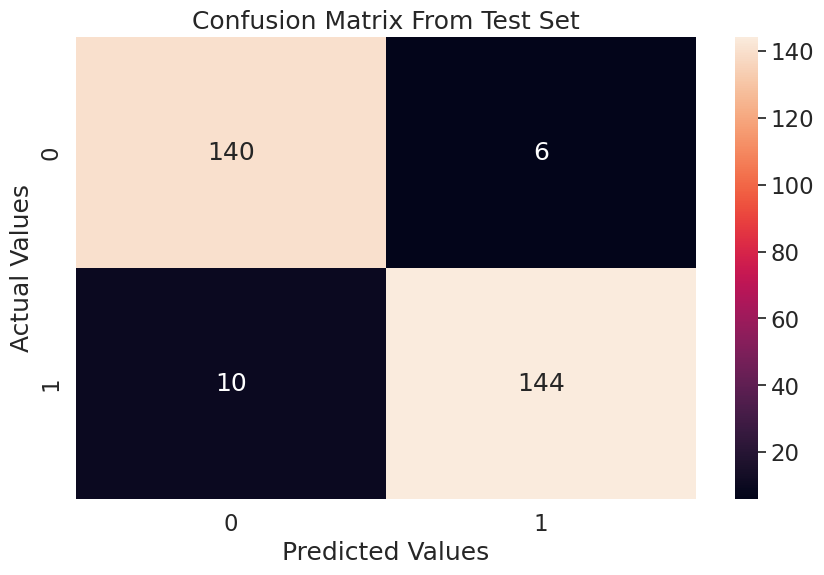

In [ ]:
cfm(y2_test1,y_pred)

#### random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)],
                       bootstrap = [True],
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)],
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)],
                       max_features = ['auto', 'sqrt', 'log2'],
                       n_jobs = [-1])

rf = RandomForestClassifier(random_state=1)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=1, scoring='recall')
rf_tuned.fit(X2_train1,y2_train1)

y_train_pred = rf_tuned.predict(X2_train1)
y_pred = rf_tuned.predict(X2_test1)

eval_classification(rf_tuned, y_train_pred, y_pred, y2_train1, y2_test1)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.96
Precision (Train Set): 1.00
Precision (Test Set): 0.99
Recall (Train Set): 1.00
Recall (Test Set): 0.93
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.96
AUC (Train Set): 1.00
AUC (Test Set): 0.96


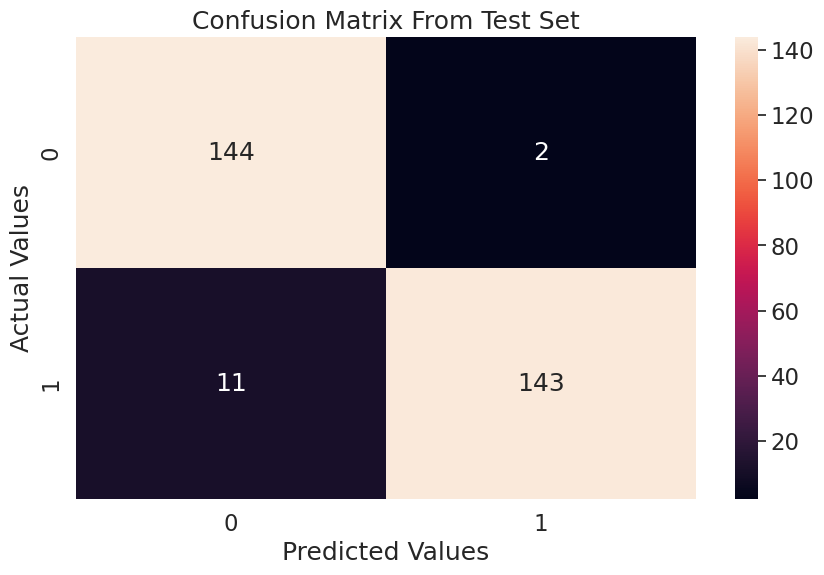

In [ ]:
cfm(y2_test1,y_pred)

#### decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

hyperparameters = dict(max_depth=[int(x) for x in np.linspace(1, 110, num = 30)],
                       min_samples_split=[2, 5, 10, 100],
                       min_samples_leaf=[1, 2, 4, 10, 20, 50],
                       max_features=['auto', 'sqrt']
                      )

dt = DecisionTreeClassifier(random_state=1)
dt_tuned = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=1, scoring='recall')
dt_tuned.fit(X2_train1, y2_train1)

y_train_pred = dt_tuned.predict(X2_train1)
y_pred = dt_tuned.predict(X2_test1)

eval_classification(dt_tuned, y_train_pred, y_pred, y2_train1, y2_test1)

Accuracy (Train Set): 0.93
Accuracy (Test Set): 0.88
Precision (Train Set): 0.97
Precision (Test Set): 0.95
Recall (Train Set): 0.88
Recall (Test Set): 0.82
F1-Score (Train Set): 0.92
F1-Score (Test Set): 0.88
AUC (Train Set): 0.93
AUC (Test Set): 0.89


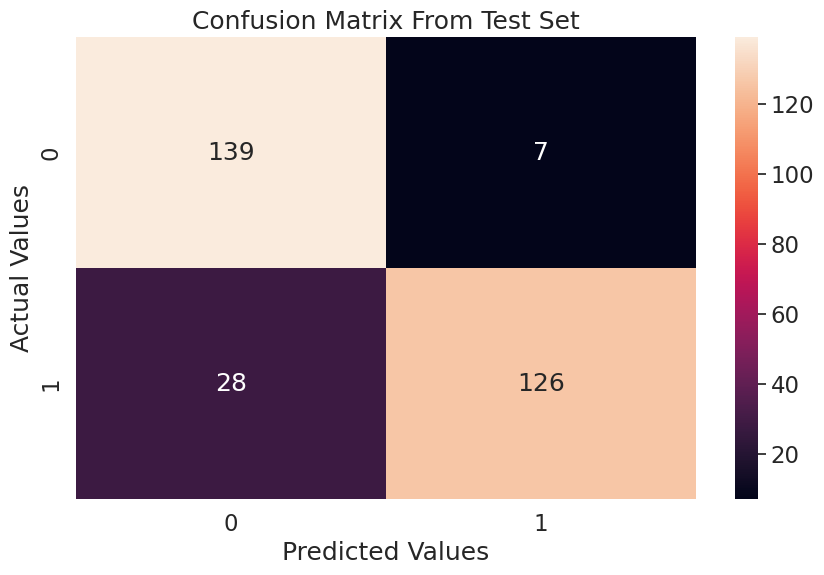

In [ ]:
cfm(y2_test1,y_pred)

#### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.neighbors import KNeighborsClassifier

hyperparameters = dict(n_neighbors = list(range(1,30)),
                       p=[1,2],
                       algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute'])

knn = KNeighborsClassifier()
knn_tuned = RandomizedSearchCV(knn, hyperparameters, cv=5, random_state=1, scoring='recall')
knn_tuned.fit(X2_train1, y2_train1)

y_train_pred = knn_tuned.predict(X2_train1)
y_pred = knn_tuned.predict(X2_test1)

eval_classification(knn_tuned, y_train_pred, y_pred, y2_train1, y2_test1)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.94
Precision (Train Set): 1.00
Precision (Test Set): 0.97
Recall (Train Set): 1.00
Recall (Test Set): 0.90
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.94
AUC (Train Set): 1.00
AUC (Test Set): 0.94


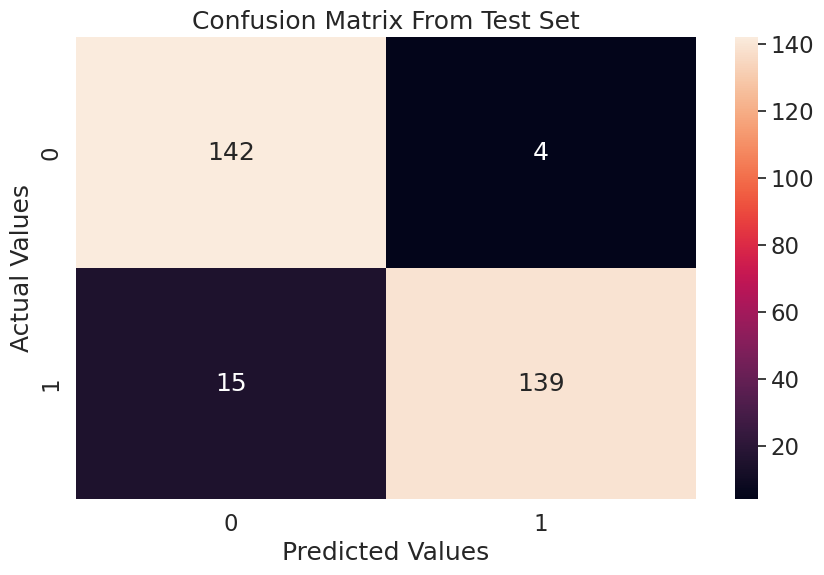

In [ ]:
cfm(y2_test1,y_pred)

## Membuat evaluasi model menggunakan confusion matrix serta tunjukan feature important dari hasil model tersebut.
Hint: Perhatikan nilai presentasi tertinggi dari salah satu  confusion matrix yang sudah ditentukan pada setiap evaluasi model, serta ambil 2 fitur utama yang dapat menentukan keberhasilan marketing.

### confusion matrix

- model yang dipilih adalah random forest.
- metrix yang dipilih adalah recall dan precision.

In [ ]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.best_estimator_.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(10).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()
    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)],
                       bootstrap = [True],
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)],
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)],
                       max_features = ['auto', 'sqrt', 'log2'],
                       n_jobs = [-1])

rf = RandomForestClassifier(random_state=1)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=1, scoring='recall')
rf_tuned.fit(X2_train1,y2_train1)

y_train_pred = rf_tuned.predict(X2_train1)
y_pred = rf_tuned.predict(X2_test1)

eval_classification(rf_tuned, y_train_pred, y_pred, y2_train1, y2_test1)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.96
Precision (Train Set): 1.00
Precision (Test Set): 0.99
Recall (Train Set): 1.00
Recall (Test Set): 0.93
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.96
AUC (Train Set): 1.00
AUC (Test Set): 0.96


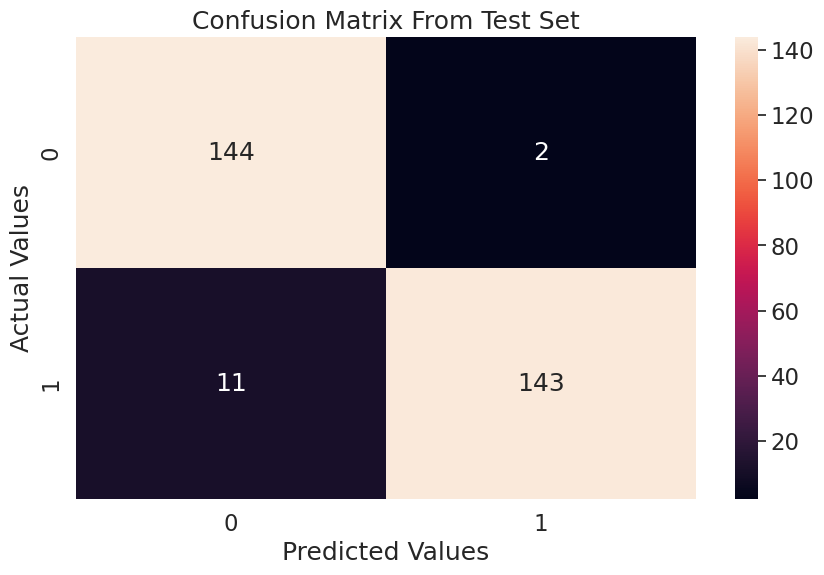

In [ ]:
cfm(y2_test1,y_pred)

In [ ]:
show_best_hyperparameter(rf_tuned.best_estimator_, hyperparameters)

Best n_estimators: 600
Best bootstrap: True
Best criterion: entropy
Best max_depth: 110
Best min_samples_split: 4
Best min_samples_leaf: 1
Best max_features: sqrt
Best n_jobs: -1


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf_best = RandomForestClassifier(random_state=1,
                                 n_estimators=600,
                                 bootstrap=True,
                                 criterion='entropy',
                                 max_depth=110,
                                 min_samples_split=4,
                                 min_samples_leaf=1,
                                 max_features='sqrt',
                                 n_jobs=-1)

In [ ]:
rf_best.fit(X2_train1,y2_train1)

y_train_pred_best = rf_best.predict(X2_train1)
y_pred_best = rf_best.predict(X2_test1)

eval_classification(rf_best, y_train_pred_best, y_pred_best, y2_train1, y2_test1)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.96
Precision (Train Set): 1.00
Precision (Test Set): 0.99
Recall (Train Set): 1.00
Recall (Test Set): 0.93
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.96
AUC (Train Set): 1.00
AUC (Test Set): 0.96


### feature important

In [ ]:
def show_feature_importance(model, X):
    show_feature_importance(rf_tuned, X)

    # Kode untuk menampilkan pentingnya fitur
    # Gunakan model dan data fitur X di sini


In [ ]:
!pip install shap

In [ ]:
model = rf_best

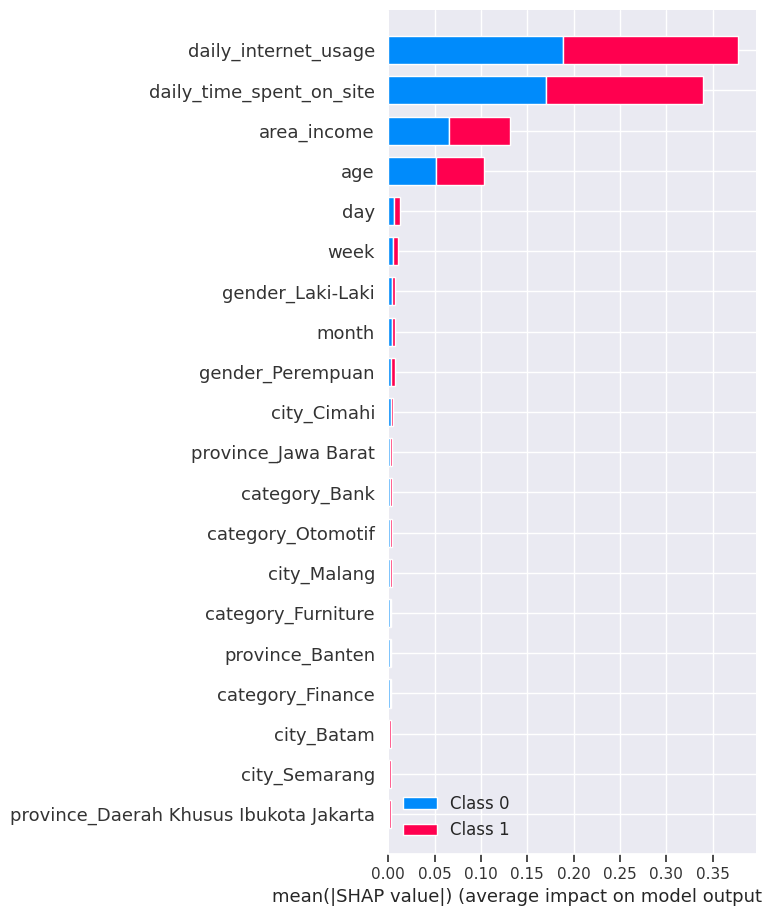

In [ ]:
import shap
shap_values = shap.TreeExplainer(model).shap_values(X2_train1)
shap.summary_plot(shap_values, X2_train1, plot_type="bar")

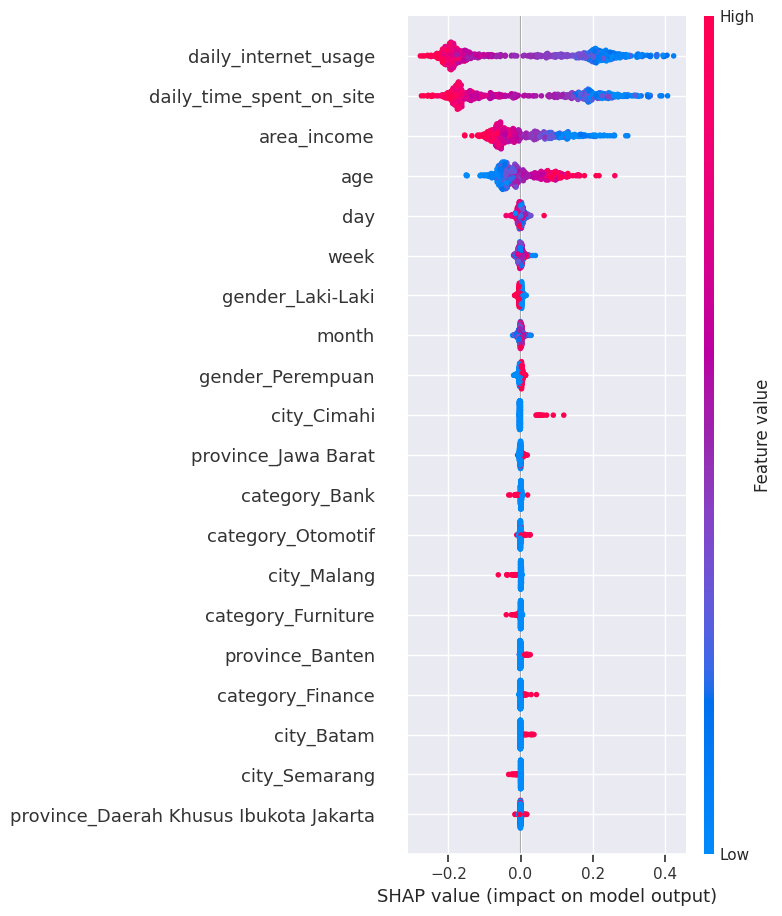

In [ ]:
a = plt.figure(figsize = (12,8))
shap.summary_plot(shap_values[1], X2_train1)

# Business Recommendation and Simulation

## Membuat rekomendasi bisnis berdasarkan feature important.
Hint: Hubungkan hasil dari EDA dan feature important sebagai bahan kajian rekomendasi bisnis.


fitur important menunjukkan bahwa fitur yang memiliki pengaruh terhadap tabel clicked_on_ad adalah fitur dily_internet_usage, daily_time_spent_on_site, area_income, dan age.

In [ ]:
df2.shape

(1000, 11)

In [ ]:
df2.sample(3)

,unnamed:_0,daily_time_spent_on_site,age,area_income,daily_internet_usage,gender,timestamp,clicked_on_ad,city,province,category
600,600,84.00,48,328079710.00,136.21,Laki-Laki,4/17/2016 5:08,1,Tangerang,Banten,House
300,300,69.97,28,385291200.00,250.00,Perempuan,5/22/2016 0:01,0,Jakarta Selatan,Daerah Khusus Ibukota Jakarta,Health
954,954,51.65,31,412975920.00,249.99,Perempuan,5/25/2016 10:39,0,Palembang,Sumatra Selatan,Otomotif


In [ ]:
# Ubah kolom timestamp menjadi tipe datetime
df2['timestamp'] = pd.to_datetime(df2['timestamp'], format='%m/%d/%Y %H:%M')

# Buat kolom-kolom baru
df2['year'] = df2['timestamp'].dt.year
df2['month'] = df2['timestamp'].dt.month
df2['week'] = df2['timestamp'].dt.week
df2['day'] = df2['timestamp'].dt.day


Mengelompokkan usia berdasarkan distribusi data
- 19-29 tahun: Kelompok usia Dewasa Muda.
- 30-35 tahun: Kelompok usia Dewasa Awal.
- 36-42 tahun: Kelompok usia Dewasa Pertengahan.
- 43-61 tahun: Kelompok usia Dewasa Lanjut.

In [ ]:
import pandas as pd

# Definisikan DataFrame df2
#df2 = ...

# Definisikan fungsi group
def group(x):
    result = ''  # Inisialisasi result dengan nilai default
    if x['age'] > 42:
        result = 'dewasa-lanjut'
    elif 35 < x['age'] <= 42:
        result = 'dewasa-pertengahan'
    elif 29 < x['age'] <= 35:
        result = 'dewasa-awal'
    elif 19 < x['age'] <= 29:
        result = 'dewasa-muda'
    return result

# Gunakan apply untuk mengisi kolom 'age_group'
df2['age_group'] = df2.apply(lambda x: group(x), axis=1)

In [ ]:
df2[['age','age_group']].sample(4)

,age,age_group
490,40,dewasa-pertengahan
757,35,dewasa-awal
945,36,dewasa-pertengahan
854,34,dewasa-awal


In [ ]:
orders = ['dewasa-muda','dewasa-awal','dewasa-pertengahan','dewasa-lanjut']
df2['age_group'] = pd.Categorical(df2['age_group'], categories=orders, ordered=True)

In [ ]:
df2.groupby(['age_group']).agg({'age':'count'}).reset_index()

,age_group,age
0,dewasa-muda,258
1,dewasa-awal,258
2,dewasa-pertengahan,247
3,dewasa-lanjut,231


In [ ]:
dfg1 = df2.groupby(['clicked_on_ad','age_group']).agg({'daily_internet_usage':['count','mean'],
                                                       'daily_time_spent_on_site':['mean']}).reset_index()
dfg1.columns=['is_click','age_group','total','avg_daily_internet_usage','avg_time_spent']
dfg1 = dfg1.sort_values(['is_click','avg_daily_internet_usage'],ascending=[False,False])
dfg1

,is_click,age_group,total,avg_daily_internet_usage,avg_time_spent
4,1,dewasa-muda,64,158.36,54.78
5,1,dewasa-awal,87,147.95,54.42
7,1,dewasa-lanjut,205,145.42,53.81
6,1,dewasa-pertengahan,143,138.58,51.14
3,0,dewasa-lanjut,26,223.64,77.47
1,0,dewasa-awal,171,217.79,78.02
2,0,dewasa-pertengahan,104,216.71,78.65
0,0,dewasa-muda,194,208.96,74.66


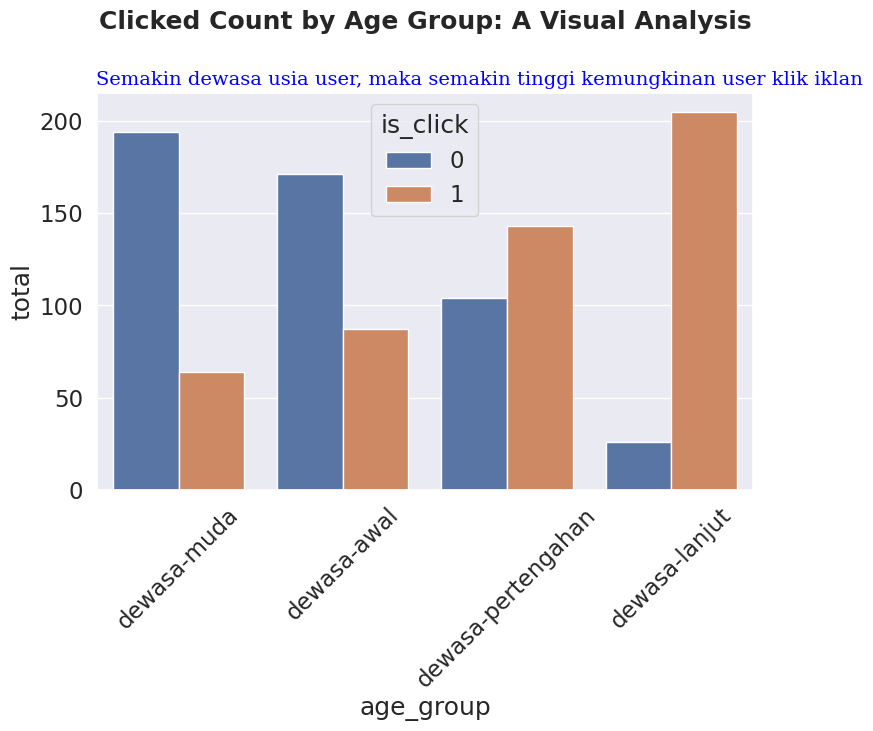

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x='age_group',y='total', hue='is_click',data=dfg1)

# Memberikan judul pada grafik
plt.title('Clicked Count by Age Group: A Visual Analysis\n\n',fontsize=18, fontweight='bold')
plt.title('Semakin dewasa usia user, maka semakin tinggi kemungkinan user klik iklan',
          fontsize=14, family='serif', loc='left', color='blue')

plt.tight_layout()
plt.savefig('clicked count by age', dpi=200)
plt.xticks(rotation=45)
plt.show()

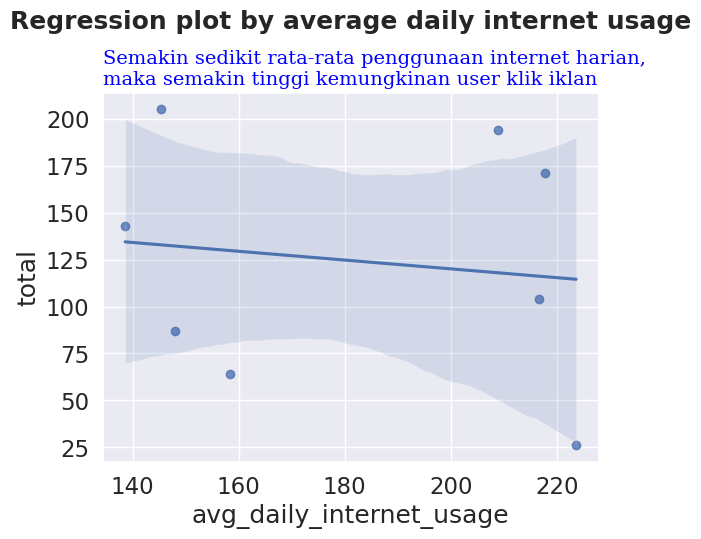

In [ ]:
# Membuat plot
sns.regplot(x='avg_daily_internet_usage', y='total', data=dfg1)

plt.title('Regression plot by average daily internet usage\n\n',fontsize=18, fontweight='bold')
plt.title('Semakin sedikit rata-rata penggunaan internet harian,\nmaka semakin tinggi kemungkinan user klik iklan',
          fontsize=14, family='serif', loc='left', color='blue')


# Menampilkan plot
plt.show()

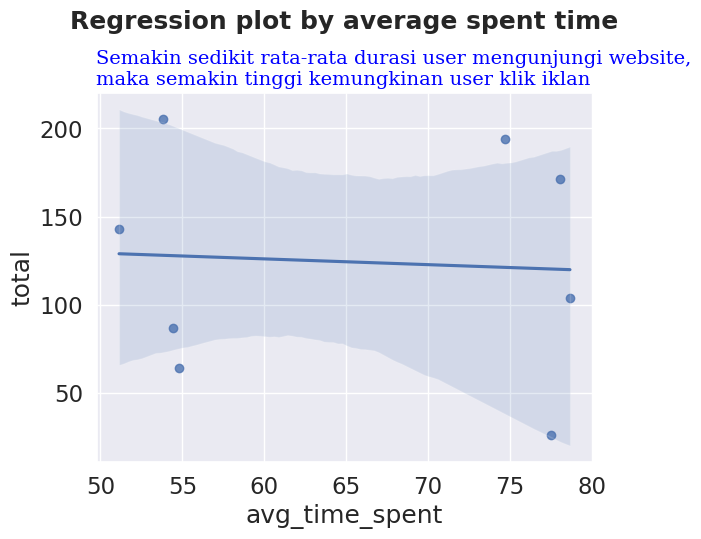

In [ ]:
# Membuat plot
sns.regplot(x='avg_time_spent', y='total', data=dfg1)

plt.title('Regression plot by average spent time\n\n',fontsize=18, fontweight='bold')
plt.title('Semakin sedikit rata-rata durasi user mengunjungi website,\nmaka semakin tinggi kemungkinan user klik iklan',
          fontsize=14, family='serif', loc='left', color='blue')

# Menampilkan plot
plt.show()

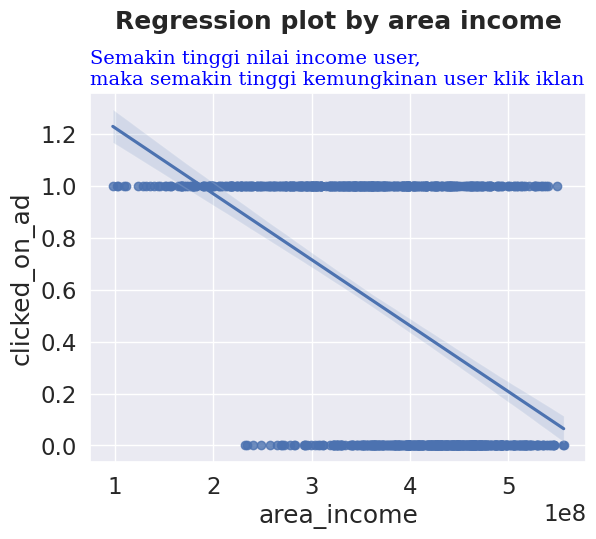

In [ ]:
# Membuat plot
sns.regplot(x='area_income', y='clicked_on_ad', data=df2)

plt.title('Regression plot by area income\n\n',fontsize=18, fontweight='bold')
plt.title('Semakin tinggi nilai income user,\nmaka semakin tinggi kemungkinan user klik iklan',
          fontsize=14, family='serif', loc='left', color='blue')

# Menampilkan plot
plt.show()

## Membuat simulasi bisnis dengan tanpa menggunakan hasil dari model machine learning dengan menunjukan cost, revenue, serta profit dari marketing tersebut.
Hint: Jumlah user dan biaya pemasaran pada simulasi pertama dan kedua harus sama, perhatikan conversion rate yang terdampak pada revenue dan profit


In [ ]:
# Hitung jumlah total pengunjung
total_pengunjung = len(df2)

# Hitung jumlah pengunjung yang mengklik iklan (1=yes)
pengunjung_klik = (df2['clicked_on_ad'] == 1).sum()

# Hitung persentase pengunjung yang mengklik iklan
persentase_klik = (pengunjung_klik / total_pengunjung) * 100

print(f'Persentase orang yang mengklik iklan: {persentase_klik:.2f}%')

Persentase orang yang mengklik iklan: 50.00%


In [ ]:
cost = 10000
laba = 5000
total_cost = (total_pengunjung*cost)

print(f'Total cost:',total_cost)

Total cost: 10000000


In [ ]:
revenue = (pengunjung_klik*cost)+(pengunjung_klik*laba)

print(f'Total revenue:',revenue)

Total revenue: 7500000


In [ ]:
# provit = total revenue - total cost
provit = revenue - total_cost

print(f'Profit:',provit)

Profit: -2500000


## Membuat simulasi bisnis dengan menggunakan hasil dari model machine learning dengan menunjukan cost, revenue, serta profit dari marketing tersebut.
Hint: Perhatikan conversion rate yang tinggi dapat meningkatkan hasil dari target marketing.


In [ ]:
# recall = fn/(tn+fn)

recall = (11/(144+11))*100

print(f'persentase customer yang tidak klik ads:',recall)

persentase customer yang tidak klik ads: 7.096774193548387


In [ ]:
# pengunjung klik after model
am_pengunjung_klik = total_pengunjung - (total_pengunjung * recall / 100)

print('jumlah pengunjung yang klik ads setelah menggunakan model', am_pengunjung_klik)

jumlah pengunjung yang klik ads setelah menggunakan model 929.0322580645161


In [ ]:
cost = 10000
total_cost = (total_pengunjung*cost)

print(f'Total cost:',total_cost)

Total cost: 10000000


In [ ]:
# revenue after model
am_revenue = (am_pengunjung_klik*cost)+(am_pengunjung_klik*laba)

print(f'Total revenue:',am_revenue)

Total revenue: 13935483.870967742


In [ ]:
# provit after model
am_provit = am_revenue - total_cost

print(f'Profit setelah menggunakan model:',am_provit)

Profit setelah menggunakan model: 3935483.870967742
